In [60]:
import cv2, os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [61]:
root = 'C:/Users/tsai/Desktop/yu_wei/pytorch-CycleGAN-and-pix2pix-master/results/maps_cyclegan/test_latest/images/rec/'
file_name = []
file_name = [f for f in os.listdir(root) if f.endswith('.png')]
len(file_name)

550

In [62]:
save_dir = 'C:/Users/tsai/Desktop/yu_wei/pytorch-CycleGAN-and-pix2pix-master/results/maps_cyclegan/test_latest/images/rec_mask/'

for name in file_name:
    img = cv2.imread(root+name)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
#     ret,mask = cv2.threshold(gray,50,255,cv2.THRESH_BINARY_INV)
    gray = cv2.GaussianBlur(gray,(5,5),0)
    ret2, mask = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    defect = cv2.bitwise_and(img, img, mask=mask)
    image = Image.fromarray(cv2.cvtColor(defect,cv2.COLOR_BGR2RGB)) 

    newImage = []

    for item in image.getdata():
        if item[:3] == (0, 0, 0):
            newImage.append((0, 0, 0, 0))
        else:
            newImage.append(item)

    image.putdata(newImage)
#     image.save('./bgrm/bgrm_'+name)
    image.save(save_dir+name)

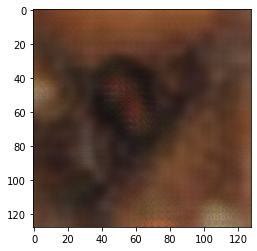

In [63]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

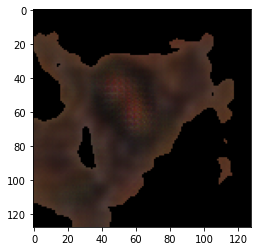

In [64]:
plt.imshow(image)